In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as mtr
import pickle
import dataframe_image as dfi

pd.options.display.max_colwidth = 200

In [2]:
metrics = []

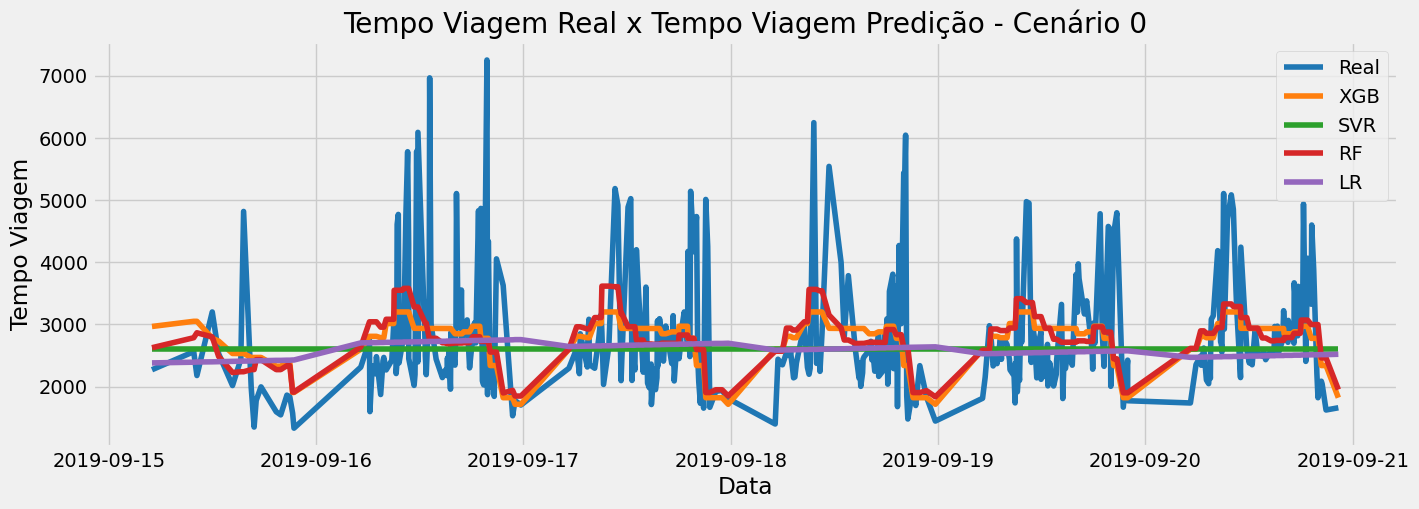

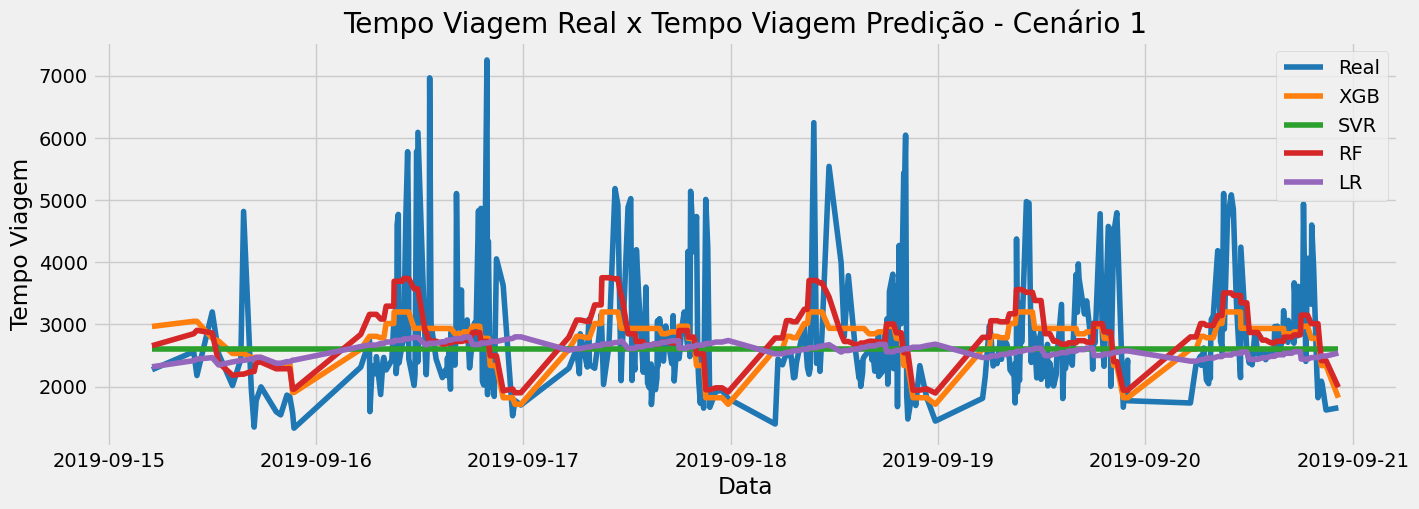

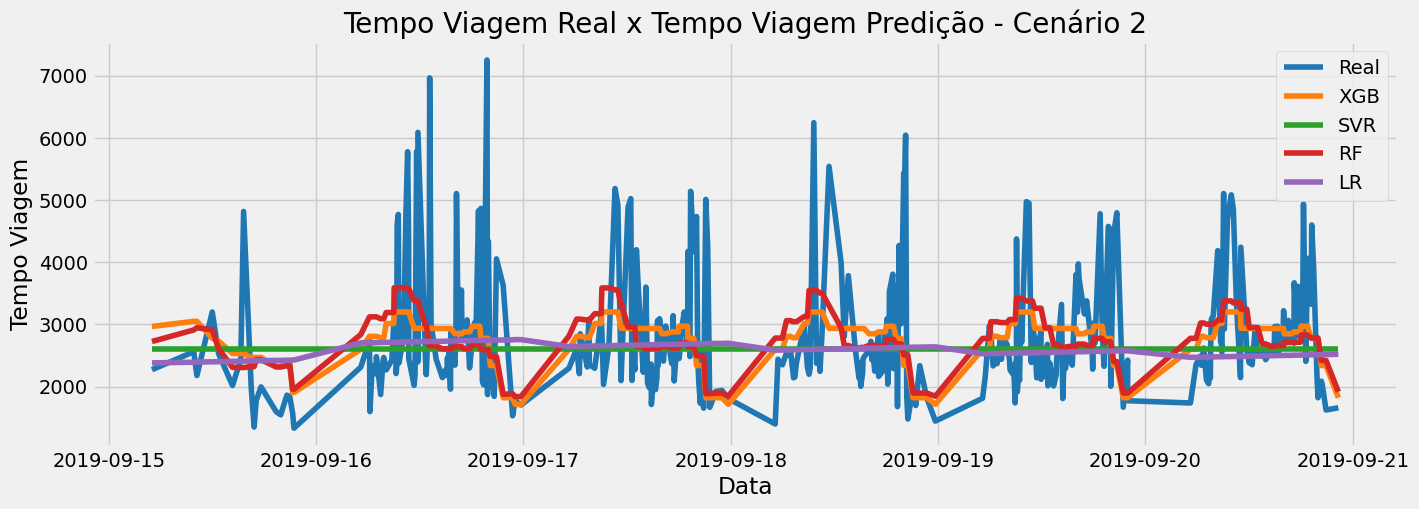

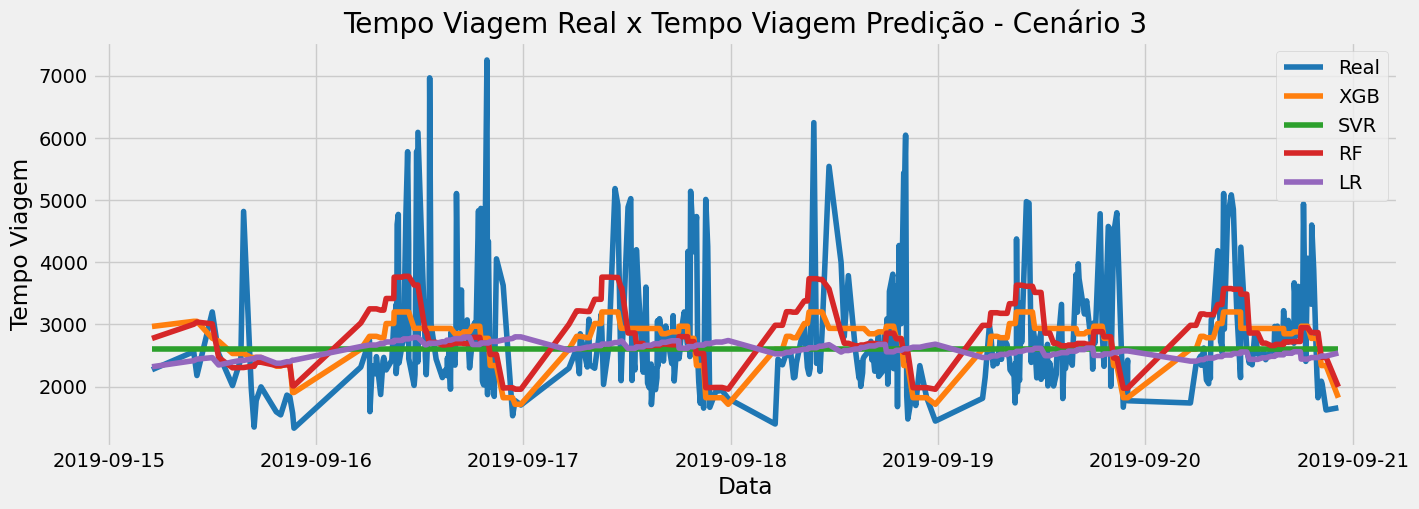

In [3]:
for cenario in range(4):

        df = pd.read_csv(f'../Bases/Predictions/rota32893_predictions_cen_{cenario}.csv')
        df["data_partida"] = pd.to_datetime(df["data_partida"])

        RRSE_xgb = np.sqrt(sum((df["tempo_viagem"] - df["predicao_xgb"]) ** 2) / sum((df["tempo_viagem"] - np.mean(df["tempo_viagem"])) ** 2))
        RMSE_xgb = mtr.mean_squared_error(df["tempo_viagem"], df["predicao_xgb"], squared=False) 
        MAPE_xgb = mtr.mean_absolute_percentage_error(df["tempo_viagem"], df["predicao_xgb"])

        RRSE_rf = np.sqrt(sum((df["tempo_viagem"] - df["predicao_rf"]) ** 2) / sum((df["tempo_viagem"] - np.mean(df["tempo_viagem"])) ** 2))
        RMSE_rf = mtr.mean_squared_error(df["tempo_viagem"], df["predicao_rf"], squared=False) 
        MAPE_rf = mtr.mean_absolute_percentage_error(df["tempo_viagem"], df["predicao_rf"])

        RRSE_svr = np.sqrt(sum((df["tempo_viagem"] - df["predicao_svr"]) ** 2) / sum((df["tempo_viagem"] - np.mean(df["tempo_viagem"])) ** 2))
        RMSE_svr = mtr.mean_squared_error(df["tempo_viagem"], df["predicao_svr"], squared=False) 
        MAPE_svr = mtr.mean_absolute_percentage_error(df["tempo_viagem"], df["predicao_svr"])

        RRSE_lr = np.sqrt(sum((df["tempo_viagem"] - df["predicao_lr"]) ** 2) / sum((df["tempo_viagem"] - np.mean(df["tempo_viagem"])) ** 2))
        RMSE_lr = mtr.mean_squared_error(df["tempo_viagem"], df["predicao_lr"], squared=False) 
        MAPE_lr = mtr.mean_absolute_percentage_error(df["tempo_viagem"], df["predicao_lr"])


        metrics.append(['RRSE', RRSE_xgb, RRSE_rf, RRSE_svr, RRSE_lr, cenario])
        metrics.append(['RMSE', RMSE_xgb, RMSE_rf, RMSE_svr, RMSE_lr, cenario])
        metrics.append(['MAPE', MAPE_xgb, MAPE_rf, MAPE_svr, MAPE_lr, cenario])  

        plt.style.use("fivethirtyeight")

        plt.figure(figsize=(15, 5))

        plt.xlabel("Data")
        plt.ylabel("Tempo Viagem")
        plt.title(f"Tempo Viagem Real x Tempo Viagem Predição - Cenário {cenario}")

        df_plot_predicao = df[(df["data_partida"] > "2019-09-15") & (df["data_partida"] < "2019-09-21")]

        plt.plot(df_plot_predicao["data_partida"], df_plot_predicao["tempo_viagem"], color="#1f77b4", label="Real")
        plt.plot(df_plot_predicao["data_partida"], df_plot_predicao["predicao_xgb"], color="#ff7f0e", label="XGB")
        plt.plot(df_plot_predicao["data_partida"], df_plot_predicao["predicao_svr"], color="#2ca02c", label="SVR")
        plt.plot(df_plot_predicao["data_partida"], df_plot_predicao["predicao_rf"], color="#d62728", label="RF")
        plt.plot(df_plot_predicao["data_partida"], df_plot_predicao["predicao_lr"], color="#9467bd", label="LR")
        plt.legend()

        plt.savefig(f"Images/Charts/32893_line_chart_cen_{cenario}.jpg")

In [4]:
metrics = pd.DataFrame(metrics, columns=['Métrica', 'XGBoosting','Random Forest','Support Vector Regression','Linear Regression', 'Cenário'])

dfi.export(metrics, f"Images/Metrics/metrics_32893.jpg")

In [5]:
#print(metrics)